<a href="https://colab.research.google.com/github/darkknightraj/redme.me/blob/main/Copy_of_Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
dataSet=pd.read_csv("/content/Mall_Customers_dataset.csv")


In [ ]:
dataSet.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dataSet.isnull().sum()#It shows that no null values in the dataset so our dataset is clean


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

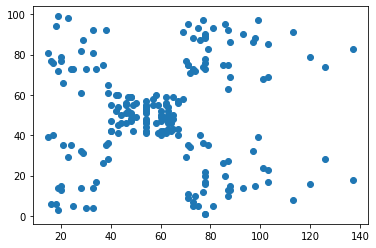

In [ ]:
#To find K value
#plot
plt.scatter(dataSet["Annual Income (k$)"],dataSet.iloc[:,4])
#From this we can assume that our K is 5 as we can see 5 groups here
#let we check with elbow method

In [ ]:
#Elbow Method
sse=[]
k=[]
for i in range(1,11):
 k.append(i)
 model1=KMeans(n_clusters=i)
 model1.fit(dataSet[["Annual Income (k$)","Spending Score (1-100)"]])
 sse.append(model1.inertia_)#To get SSE use inertia_ here
 sse

In [ ]:
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

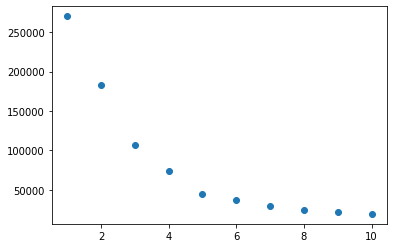

In [ ]:
#plot between k and sse obtained
plt.scatter(k,sse)#Here we observe maximum bend at 5

In [ ]:
#so Our K i.e,. no of clusters is 5
#Fitting Model
km=KMeans(n_clusters=5)
km.fit(dataSet[["Annual Income (k$)","Spending Score (1-100)"]])
y_pred=km.predict(dataSet[["Annual Income (k$)","Spending Score (1-100)"]])
y_pred

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [ ]:
#Add predicted column to dataframe
df=pd.DataFrame(dataSet)
df["Cluster"]=y_pred
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


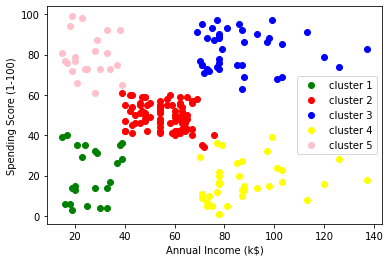

In [ ]:
#let we plot along with Centroids
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
df4=df[df.Cluster==3]
df5=df[df.Cluster==4]
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color="green",label="cluster 1")
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color="red",label="cluster 2")
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color="blue",label="cluster 3")
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color="yellow",label="cluster 4")
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color="pink",label="cluster 5")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()

In [ ]:
#let us have a look at centroids
centroids=km.cluster_centers_
centroids

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

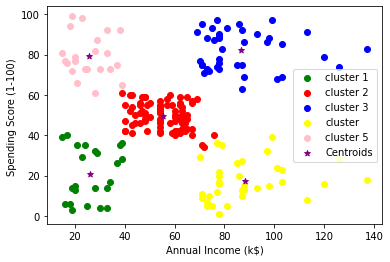

In [ ]:
#Seperating dataset according to clusters
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
df4=df[df.Cluster==3]
df5=df[df.Cluster==4]
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color="green",label="cluster 1")
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color="red",label="cluster 2")
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color="blue",label="cluster 3")
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color="yellow",label="cluster") 
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color="pink",label="cluster 5")
plt.scatter(centroids[:,0],centroids[:,1],color="purple",marker="*",label="Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100) ")
plt.legend()